# Looking at all things SVM's using sklearn

In [42]:
from sklearn.svm import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

## Linear SVM

We will first look at linear SVMs using sklearn using the iris data set. First we will load the data then extract only the petal lengths/widths and make it a binary classifaction of either a Iris virginica flower or not.

In [25]:
iris = load_iris()
X = iris["data"][: ,(2,3)]
y = (iris["target"] == 2).astype(np.float64)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


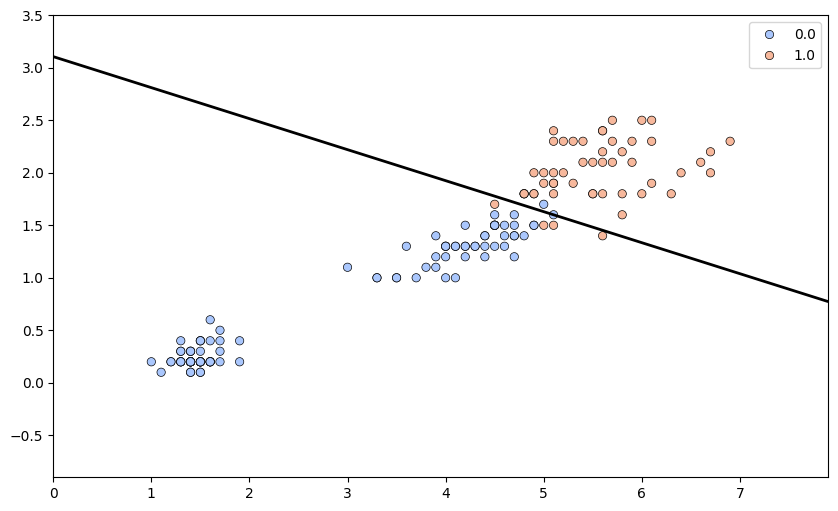

In [45]:
svm_linear_pip = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss = "hinge"))
])

svm_linear_pip.fit(X, y)

svc_linar = svm_linear_pip["linear_svc"]
scaler = svm_linear_pip.named_steps["scaler"]


coef = svc_linar.coef_
intercept = svc_linar.intercept_

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

xy_grid = np.c_[xx.ravel(), yy.ravel()]

xy_grid_scaled = scaler.transform(xy_grid)

Z = np.dot(xy_grid_scaled, coef[0]) + intercept
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 6))

sb.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor='k')


plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
